0.5 1.5
The value of alpha is 1.0172413885593414
The minimum value of the function is: 28.98275862068966
The point where minima occurs is: [ 5.05172417 12.12068972]
The gradient at that point is: [-16 -10]
The dot product of the gradient and the search direction is: -118
Since the dot product is negative, we can conclude that the search direction is a gradient descent one


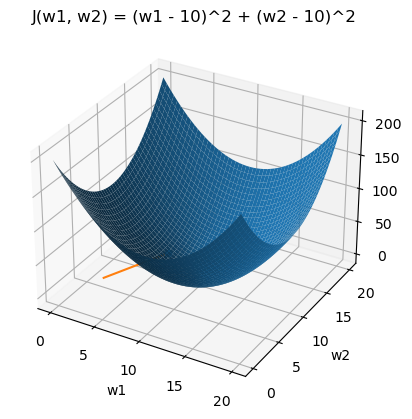

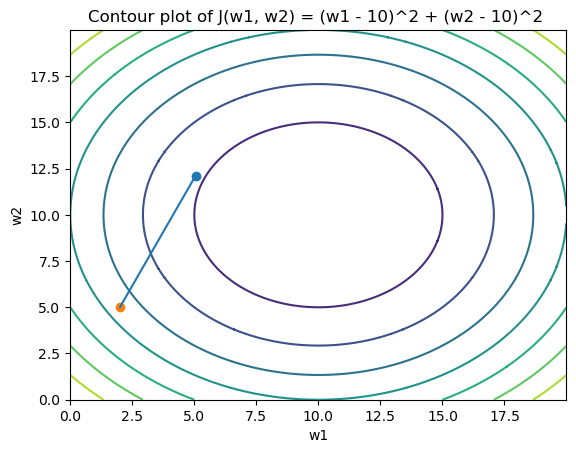

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def J(w1,w2):
    return (w1-10)**2+(w2-10)**2

def delJ(w1,w2):
    return np.array([2*(w1-10),2*(w2-10)])

def point_search(alpha):
    x1=x0+alpha*s1
    # print(x1)
    return x1

def J1(alpha):
    x1=point_search(alpha)
    P= J(x1[0],x1[1])
    return P

def bracketing(a,b,n):

    w1=a
    delw=(b-a)/n
    w2=w1+delw
    w3=w2+delw
    for w1 in range(5):
        w1=w2
        w2=w3
        w3=w3+delw
        
        if J1(w1)>=J1(w2) and J1(w2)<=J1(w3):
            # print('Minima lies between:',w1,'and',w3)
            W=(w1,w3)
            return W
            break
        if w3>=5:
            break

def interval_halving(a1,b1):

    # a1=w1
    # b1=w3
    print(a1,b1)
    l=b1-a1

    e1=0.00000000000001

    while abs(l)>=e1:
        
        wm=(a1+b1)/2
        x1=a1+l/4
        x2=b1-l/4

        if J1(x1)<J1(wm):
            b1=wm
            wm=x1
            
        elif J1(x2)<J1(wm):
            a1=wm
            wm=x2
        
        else:
            a1=x1
            b1=x2
        
        l=b1-a1
        range2=(a1,b1)
        avg=sum(range2)/2
        
    return avg
  
x0=np.array([2,5])
s1=np.array([3,7])
b=bracketing(0,5,10)
c=interval_halving(b[0],b[1])
print('The value of alpha is',c)
x1=point_search(c)
print('The minimum value of the function is:',J1(c))
print('The point where minima occurs is:',x1)

print('The gradient at that point is:',delJ(2,5))
print('The dot product of the gradient and the search direction is:',np.dot(delJ(2,5),s1))
print('Since the dot product is negative, we can conclude that the search direction is a gradient descent one')

w1=np.arange(0,20,0.01)
w2=np.arange(0,20,0.01)
w1,w2=np.meshgrid(w1,w2)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(w1,w2,J(w1,w2))
ax.scatter(x1[0],x1[1])
xcoordinates=[x0[0],x1[0]]
ycoordinates=[x0[1],x1[1]]
plt.plot(xcoordinates,ycoordinates)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2')

fig2=plt.figure()
plt.contour(w1,w2,J(w1,w2))
plt.scatter(x1[0],x1[1])
plt.scatter(x0[0],x0[1])
plt.plot(xcoordinates,ycoordinates)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour plot of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2 ')
plt.show()







